In [1]:
import os 
os.chdir('../')
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from PIL import Image
import numpy as np

In [3]:
import tensorflow as tf
import tf_extend as tfe
from run.input import input_fn3
tf.logging.set_verbosity(tf.logging.DEBUG)

In [4]:
dataset = input_fn3()
iterator = dataset.make_one_shot_iterator()

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [5]:
samples = iterator.get_next()
images = samples['image']
bboxes = samples['gtBboxes']

In [6]:
bboxes_float = tfe.convert_bboxes_to_float(bboxes, tfe.img_shape(images))
images_bboxes = tf.image.draw_bounding_boxes(images, bboxes_float)

In [7]:
sess = tf.Session()

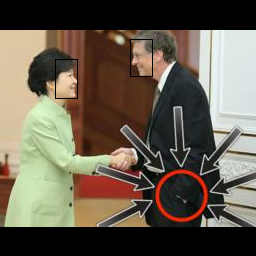

In [28]:
[np_images_bboxes] = sess.run([images_bboxes])
im = Image.fromarray(np_images_bboxes[0].astype(np.uint8), mode='RGB')
im

In [1]:
from PIL import Image, ImageDraw
from datasets.widerface import read_annotation

ModuleNotFoundError: No module named 'datasets'

In [19]:
imgName='0--Parade/0_Parade_marchingband_1_422.jpg'
imagePath = '/home/luojiapeng/datasets/widerface/WIDER_train/images/%s' % imgName

In [20]:
annotation = read_annotation('/home/luojiapeng/datasets/widerface/wider_face_split/wider_face_train_bbx_gt.txt')

In [ ]:
img = Image.open(imagePath)
img_draw = ImageDraw.Draw(img)
for b in annotation[imgName][:,:4]:
    img_draw.rectangle([b[1], b[0], b[3], b[2]], outline='green')
img

In [1]:
from PIL import Image, ImageDraw
import numpy as np

In [2]:
img = np.ones([128,128,3], np.uint8)*255

In [3]:
img = Image.fromarray(img)
img.crop([-10,-10,10,10])